Populating the interactive namespace from numpy and matplotlib


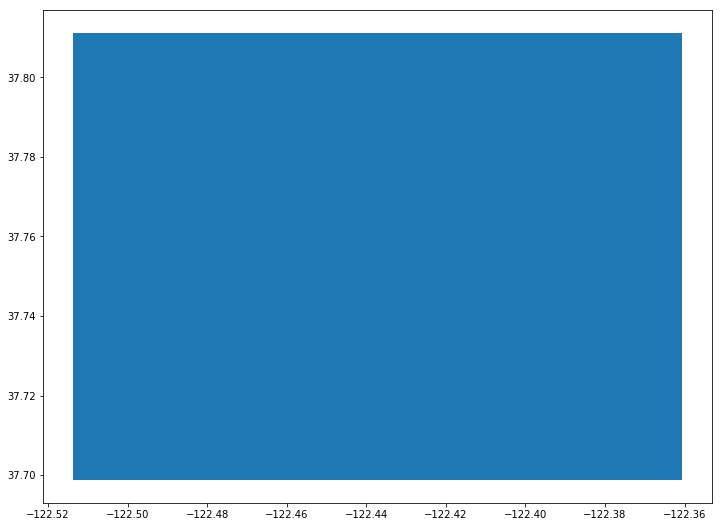

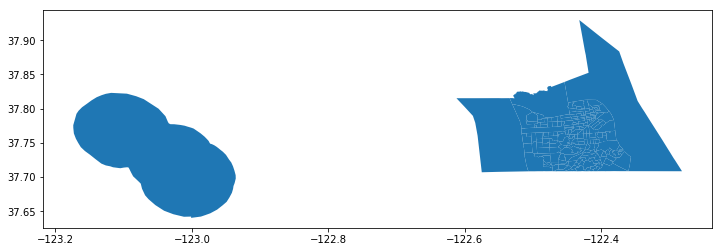

In [1]:
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import numpy as np
import geopandas as gpd
from __future__ import print_function
import pylab as pl
import os
import json
import sys
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import requests
import geopandas


figsize(12,12)
grid_path = 'grid.shp'
grid = GeoDataFrame.from_file(grid_path)
grid.plot()

figsize(12,12)
ct_path = 'Census 2010_ Tracts for San Francisco/geo_export_37b271b2-e173-4141-af90-f73bdfd64bd3.shp' #census tract
sf_ct = GeoDataFrame.from_file(ct_path)
sf_ct.plot()

def tract(df,name):
    df.columns = df.iloc[0,:]
    df = df.iloc[1:,:]
    tract_id = df['Geography']
    df.columns = df.columns + '_{}'.format(name)
    df['name10'] = tract_id.apply(lambda x: x.split(' ')[2].replace(',',''))
    return df


def filter_column(dataset):
    col = []
    for i in dataset.columns.values:
        if 'Estimate' in i:
            col.append(i)
        else:
            print('Delete {}'.format(i))
    return col

In [2]:
rent = pd.read_csv('BEDROOMS BY GROSS RENT/ACS_12_5YR_B25068_with_ann.csv')
tract_rent = tract(rent, 'rent')
filter_column(rent)
rent_new = tract_rent[filter_column(tract_rent)]
rent_new['name10'] = tract_rent['name10']
rent_new

kitchen_ut = pd.read_csv('Complete and incomplete kitchen utilities/ACS_12_5YR_B25051_with_ann.csv') # kitchen utility
tract_kitchen_ut = tract(kitchen_ut, 'kitchen_ut')
filter_column(kitchen_ut)
kitchen_ut_new = tract_kitchen_ut[filter_column(tract_kitchen_ut)]
kitchen_ut_new['name10'] = tract_kitchen_ut['name10']
kitchen_ut_new

kitchen_facility = pd.read_csv('IMPUTATION OF KITCHEN FACILITIES/ACS_12_5YR_B992510_with_ann.csv')
tract_kitchen_facility = tract(kitchen_facility, 'kitchen_facility')
kitchen_facility_new = tract_kitchen_facility[filter_column(tract_kitchen_facility)]
kitchen_facility_new['name10'] = tract_kitchen_facility['name10']
kitchen_facility_new

income = pd.read_csv('Median Income by family size/ACS_12_5YR_B19119_with_ann.csv')
tract_income = tract(income, 'income')
income_new = tract_income[filter_column(tract_income)]
income_new['name10'] = tract_income['name10']
income_new

education = pd.read_csv('TENURE BY EDUCATIONAL ATTAINMENT OF HOUSEHOLDER/ACS_12_5YR_B25013_with_ann.csv')
tract_education = tract(education, 'education')
education_new = tract_education[filter_column(tract_education)]
education_new['name10'] = tract_education['name10']
education_new


tenure_kitchen = pd.read_csv('TENURE BY KITCHEN FACILITIES/ACS_12_5YR_B25053_with_ann.csv')
tract_tenure_kitchen = tract(tenure_kitchen, 'tenure_kitchen')
tenure_kitchen_new = tract_tenure_kitchen[filter_column(tract_tenure_kitchen)]
tenure_kitchen_new['name10'] = tract_tenure_kitchen['name10']
tenure_kitchen_new


year = pd.read_csv('YEAR STRUCTURE BUILT/ACS_12_5YR_B25034_with_ann.csv')
tract_year = tract(year, 'year')
year_new = tract_year[filter_column(tract_year)]
year_new['name10'] = tract_year['name10']
year_new

data = pd.merge(sf_ct, year_new, on =['name10'],how='left')
data = pd.merge(data, rent_new, on =['name10'],how='left')
data = pd.merge(data, kitchen_ut_new, on =['name10'],how='left')
data = pd.merge(data, kitchen_facility_new, on =['name10'],how='left')
data = pd.merge(data, income_new, on =['name10'],how='left')
data = pd.merge(data, education_new, on =['name10'],how='left')
data = pd.merge(data, tenure_kitchen_new, on =['name10'],how='left')





/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

Delete Id
Delete Id2
Delete Geography
Delete Margin of Error; Total:
Delete Margin of Error; No bedroom:
Delete Margin of Error; No bedroom: - With cash rent:
Delete Margin of Error; No bedroom: - With cash rent: - Less than $200
Delete Margin of Error; No bedroom: - With cash rent: - $200 to $299
Delete Margin of Error; No bedroom: - With cash rent: - $300 to $499
Delete Margin of Error; No bedroom: - With cash rent: - $500 to $749
Delete Margin of Error; No bedroom: - With cash rent: - $750 to $999
Delete Margin of Error; No bedroom: - With cash rent: - $1,000 or more
Delete Margin of Error; No bedroom: - No cash rent
Delete Margin of Error; 1 bedroom:
Delete Margin of Error; 1 bedroom: - With cash rent:
Delete Margin of Error; 1 bedroom: - With cash rent: - Less than $200
Delete Margin of Error; 1 bedroom: - With cash rent: - $200 to $299
Delete Margin of Error; 1 bedroom: - With cash rent: - $300 to $499
Delete Margin of Error; 1 bedroom: - With cash rent: - $500 to $749
Delete Mar

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Delete Id_kitchen_facility
Delete Id2_kitchen_facility
Delete Geography_kitchen_facility
Delete name10
Delete Id_income
Delete Id2_income
Delete Geography_income
Delete Margin of Error; Total:_income
Delete Margin of Error; Total: - 2-person families_income
Delete Margin of Error; Total: - 3-person families_income
Delete Margin of Error; Total: - 4-person families_income
Delete Margin of Error; Total: - 5-person families_income
Delete Margin of Error; Total: - 6-person families_income
Delete Margin of Error; Total: - 7-or-more-person families_income
Delete name10
Delete Id_education
Delete Id2_education
Delete Geography_education
Delete Margin of Error; Total:_education
Delete Margin of Error; Owner-occupied housing units:_education
Delete Margin of Error; Owner-occupied housing units: - Less than high school graduate_education
Delete Margin of Error; Owner-occupied housing units: - High school graduate (including equivalency)_education
Delete Margin of Error; Owner-occupied housing un

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

Delete Margin of Error; Renter-occupied housing units:_education
Delete Margin of Error; Renter-occupied housing units: - Less than high school graduate_education
Delete Margin of Error; Renter-occupied housing units: - High school graduate (including equivalency)_education
Delete Margin of Error; Renter-occupied housing units: - Some college or associate's degree_education
Delete Margin of Error; Renter-occupied housing units: - Bachelor's degree or higher_education
Delete name10
Delete Id_tenure_kitchen
Delete Id2_tenure_kitchen
Delete Geography_tenure_kitchen
Delete Margin of Error; Total:_tenure_kitchen
Delete Margin of Error; Owner occupied:_tenure_kitchen
Delete Margin of Error; Owner occupied: - Complete kitchen facilities_tenure_kitchen
Delete Margin of Error; Owner occupied: - Lacking complete kitchen facilities_tenure_kitchen
Delete Margin of Error; Renter occupied:_tenure_kitchen
Delete Margin of Error; Renter occupied: - Complete kitchen facilities_tenure_kitchen
Delete Mar

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
for i in ['Estimate; Total: - 2-person families_income', 'Estimate; Total: - 3-person families_income', 'Estimate; Total: - 4-person families_income','Estimate; Total: - 5-person families_income','Estimate; Total: - 6-person families_income','Estimate; Total: - 7-or-more-person families_income']:
    del data[i]

data = data.replace('-',np.nan)

In [5]:
data['Estimate; Total:_income'] = data['Estimate; Total:_income'].astype(float)

In [6]:
data['Estimate; Total:_income'][data['Estimate; Total:_income'].isnull()] = data['Estimate; Total:_income'][data['Estimate; Total:_income'].notnull()].astype(float).mean()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


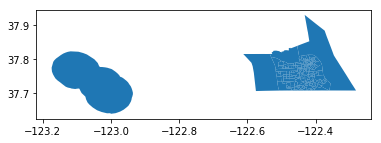

In [7]:
data.plot()

In [8]:
data.iloc[:,13:] = data.iloc[:,13:].astype(float)

In [9]:
data.to_file('new_sf.shp', driver='ESRI Shapefile')

In [10]:
data.to_csv('name_dictionary.csv')

In [16]:
data.head()

,aland10,awater10,countyfp10,tractce10,mtfcc10,name10,namelsad10,intptlon10,funcstat10,intptlat10,...,Estimate; Renter-occupied housing units: - High school graduate (including equivalency)_education,Estimate; Renter-occupied housing units: - Some college or associate's degree_education,Estimate; Renter-occupied housing units: - Bachelor's degree or higher_education,Estimate; Total:_tenure_kitchen,Estimate; Owner occupied:_tenure_kitchen,Estimate; Owner occupied: - Complete kitchen facilities_tenure_kitchen,Estimate; Owner occupied: - Lacking complete kitchen facilities_tenure_kitchen,Estimate; Renter occupied:_tenure_kitchen,Estimate; Renter occupied: - Complete kitchen facilities_tenure_kitchen,Estimate; Renter occupied: - Lacking complete kitchen facilities_tenure_kitchen
0,370459.0,0.0,075,016500,G5020,165,Census Tract 165,-122.4477884,S,+37.7741958,...,91.0,439.0,1273.0,2370.0,515.0,515.0,0.0,1855.0,1841.0,14.0
1,309097.0,0.0,075,016400,G5020,164,Census Tract 164,-122.4369729,S,+37.7750995,...,120.0,310.0,1062.0,1873.0,334.0,334.0,0.0,1539.0,1539.0,0.0
2,245867.0,0.0,075,016300,G5020,163,Census Tract 163,-122.4295509,S,+37.7760456,...,232.0,311.0,999.0,1971.0,377.0,377.0,0.0,1594.0,1473.0,121.0
3,368901.0,0.0,075,016100,G5020,161,Census Tract 161,-122.4286631,S,+37.7799831,...,656.0,471.0,886.0,2680.0,175.0,175.0,0.0,2505.0,2475.0,30.0
4,158236.0,0.0,075,016000,G5020,160,Census Tract 160,-122.4224838,S,+37.7823363,...,146.0,271.0,581.0,1578.0,443.0,443.0,0.0,1135.0,1108.0,27.0


# Identify names

In [62]:
data.columns[13::][1]

'Estimate; Total: - Built 2010 or later_year'

In [15]:
data.columns[13::][71]

'Estimate; Renter occupied: - Lacking complete kitchen facilities_tenure_kitchen'

In [30]:
path = 'new_sf.shp'
new_sf = GeoDataFrame.from_file(path)